In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [5]:
df = pd.DataFrame({'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red', 'Green', 'Red']})

In [6]:
df.head()

,Color
0,Red
1,Blue
2,Green
3,Blue
4,Red


In [7]:
encode  = pd.get_dummies(df, columns=['Color'])

In [9]:
print(encode)

   Color_Blue  Color_Green  Color_Red
0       False        False       True
1        True        False      False
2       False         True      False
3        True        False      False
4       False        False       True
5       False         True      False
6       False        False       True


In [10]:
gender_submission = pd.read_csv("C:/Users/HOU_User/OneDrive - Artra Technologies Pvt Ltd/Python_ML_Datasets/gender_submission.csv")

In [11]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [12]:
titanic_train = pd.read_csv("C:/Users/HOU_User/OneDrive - Artra Technologies Pvt Ltd/Python_ML_Datasets/train.csv") 

In [14]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
titanic_test = pd.read_csv("C:/Users/HOU_User/OneDrive - Artra Technologies Pvt Ltd/Python_ML_Datasets/test.csv")

In [17]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [18]:
titanic = pd.concat([titanic_train, titanic_test], ignore_index=True)

In [20]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
titanic.Embarked.value_counts()

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [25]:
titanic['Cabin'].isnull().sum()

np.int64(1014)

In [26]:
titanic['Pclass'].value_counts()

Pclass
3    709
1    323
2    277
Name: count, dtype: int64

In [27]:
titanic['Embarked'].value_counts()

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [28]:
titanic['Embarked'].isnull().sum()

np.int64(2)

In [30]:
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

In [36]:
titanic_encode = pd.get_dummies(titanic, columns=['Embarked', 'Sex'])

In [46]:
titanic_encode.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0.0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,False,False,True,False,True
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,True,False,False,True,False
2,3,1.0,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True,True,False
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True,True,False
4,5,0.0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,False,False,True,False,True


In [42]:
titanic_encode.drop(['Dataset'], axis=1, inplace=True)

In [47]:
one_hot_columns = [col for col in titanic_encode.columns if '_' in col]

In [48]:
one_hot_columns

['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male']

In [51]:
category_counts = titanic_encode[one_hot_columns].sum()

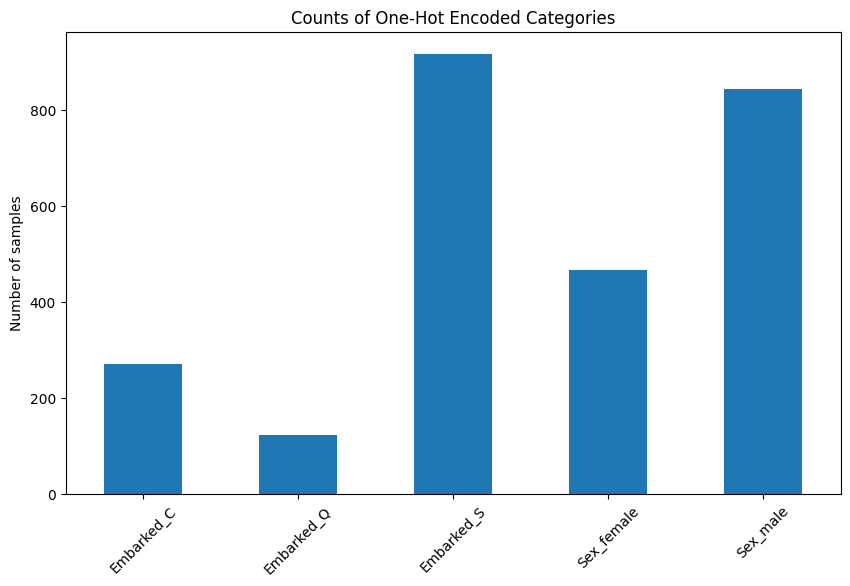

In [54]:
category_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Counts of One-Hot Encoded Categories')
plt.ylabel('Number of samples')
plt.xticks(rotation=45)
plt.show()

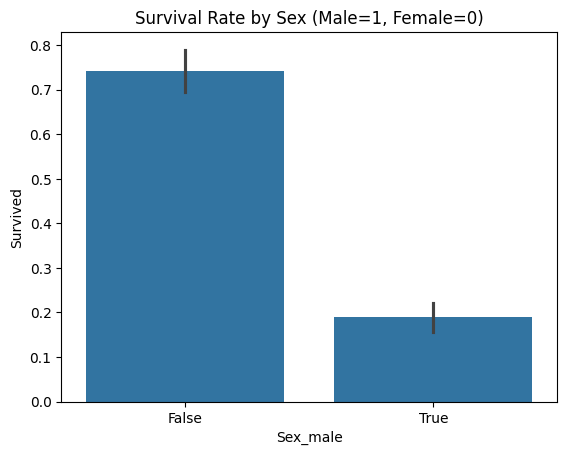

In [56]:
sns.barplot(x='Sex_male', y='Survived', data=titanic_encode)
plt.title('Survival Rate by Sex (Male=1, Female=0)')
plt.show()

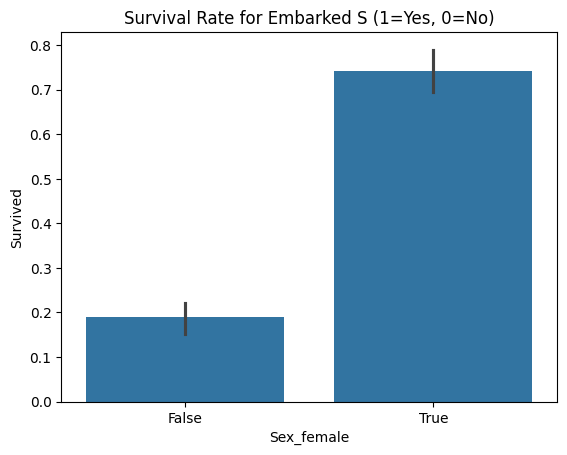

In [58]:
sns.barplot(x='Sex_female', y='Survived', data=titanic_encode)
plt.title('Survival Rate for Embarked S (1=Yes, 0=No)')
plt.show()

In [64]:
titanic_encode.select_dtypes(include='number')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,NaN,0,0,8.0500
1305,1306,NaN,1,39.0,0,0,108.9000
1306,1307,NaN,3,38.5,0,0,7.2500
1307,1308,NaN,3,NaN,0,0,8.0500


In [67]:
titanic_encode = titanic_encode.applymap(lambda x: int(x) if isinstance(x, bool) else x)

C:\Users\HOU_User\AppData\Local\Temp\ipykernel_39672\1574833764.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  titanic_encode = titanic_encode.applymap(lambda x: int(x) if isinstance(x, bool) else x)


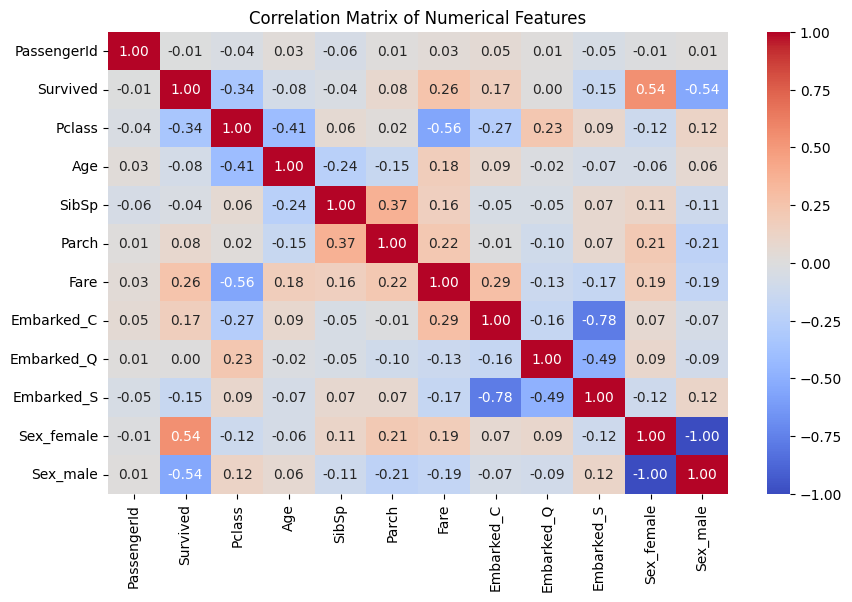

In [70]:
plt.figure(figsize=(10, 6))

sns.heatmap(titanic_encode.select_dtypes(include='number').corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [71]:
titanic_encode.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [79]:
titanic_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Pclass      1309 non-null   int64  
 2   Age         1046 non-null   float64
 3   SibSp       1309 non-null   int64  
 4   Parch       1309 non-null   int64  
 5   Fare        1308 non-null   float64
 6   Embarked_C  1309 non-null   int64  
 7   Embarked_Q  1309 non-null   int64  
 8   Embarked_S  1309 non-null   int64  
 9   Sex_female  1309 non-null   int64  
 10  Sex_male    1309 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 112.6 KB


In [98]:
titanic_encode['Fare'].fillna(titanic_encode['Fare'].median(), inplace=True)

C:\Users\HOU_User\AppData\Local\Temp\ipykernel_39672\3252549953.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_encode['Fare'].fillna(titanic_encode['Fare'].median(), inplace=True)


In [102]:
titanic_encode['Age'].fillna(titanic_encode['Age'].median(), inplace=True)

C:\Users\HOU_User\AppData\Local\Temp\ipykernel_39672\2618837533.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_encode['Age'].fillna(titanic_encode['Age'].median(), inplace=True)


In [103]:
X_train = titanic_encode[titanic_encode['Survived'].isnull()== False].drop('Survived', axis=1)
X_test = titanic_encode[titanic_encode['Survived'].isnull()== True].drop('Survived', axis=1)
y_train = titanic_encode[titanic_encode['Survived'].isnull()== False]['Survived']

In [100]:
titanic_encode['Embarked_C'].isnull().sum()

np.int64(0)

In [ ]:

X = titanic_encode.drop('Survived', axis=1)
y = titanic_encode['Survived']

In [104]:
model = LogisticRegression(max_iter = 200)
model.fit(X_train, y_train)

c:\Users\HOU_User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [105]:
y_pred = model.predict(X_test)


In [ ]:
y_pred # Here i have prdicted for survived with out droping column rows in survived(It contains NaN values) so for nan values I pridicted

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [ ]:
# Completed Nominal Encoding